<h2><b>Optimización de Portafolios de Markowitz</b></h2>
<h4>Juan David Rincón, Mayo 2023</h4>

In [1]:
# Librerias
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy

In [2]:
# Parámetros iniciales.
stocks = ["HPQ", "INTC", "JNJ", "JPM", "KO", "PFE", "PG", "PYPL", "TSLA", "XOM"]
start_date = "2016-01-01"
end_date = "2022-12-31"
risk_free_ticker = "^IRX"
num_assets = len(stocks)
numberSim = 25000

In [3]:
# Extraer datos activos.
prices_df = yf.download(stocks, start=start_date, end=end_date)['Adj Close']
print(prices_df)

[*********************100%***********************]  10 of 10 completed
                  HPQ       INTC         JNJ         JPM         KO  \
Date                                                                  
2016-01-04   9.239275  27.410318   82.232101   51.824921  33.630390   
2016-01-05   9.326888  27.281294   82.575806   51.914536  33.749352   
2016-01-06   8.992361  26.676483   82.158424   51.165092  33.566933   
2016-01-07   8.578189  25.676514   81.200897   49.096004  33.011707   
2016-01-08   8.426854  25.410389   80.333389   47.996292  32.924454   
...               ...        ...         ...         ...        ...   
2022-12-23  26.513662  25.670799  174.893036  129.302628  63.334194   
2022-12-27  26.820808  25.523211  174.843750  129.755707  63.721226   
2022-12-28  26.295689  25.129637  174.084991  130.464859  63.086098   
2022-12-29  26.791086  25.788872  174.971878  131.213409  63.463207   
2022-12-30  26.622650  26.005337  174.075119  132.080154  63.125793   

     

In [4]:
# Extraer tasa libre de riesgo.
risk_free = yf.Ticker(risk_free_ticker).info["regularMarketPreviousClose"]
risk_free /= 100
print(risk_free)

0.050950002999999994


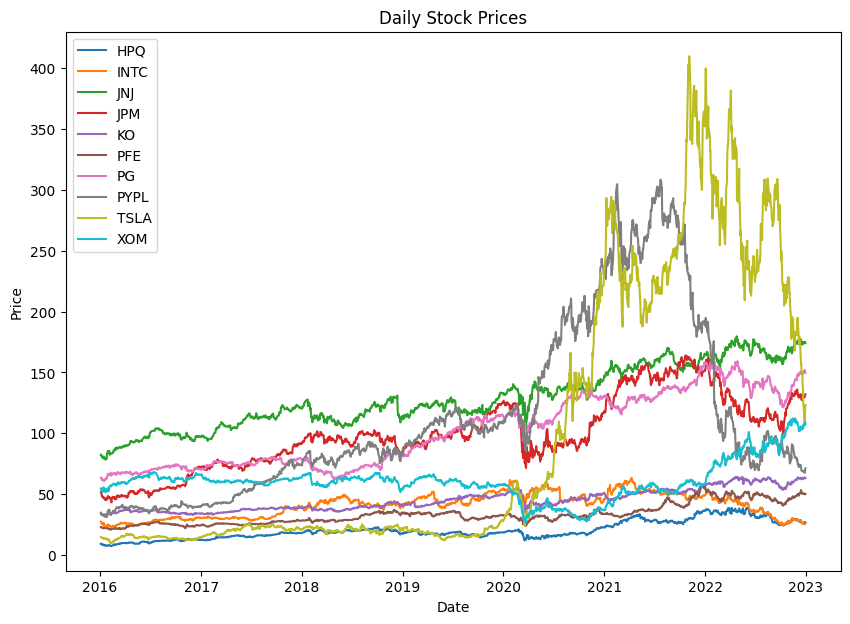

In [5]:
# Gráfica precios.
plt.figure(figsize=(10,7))

for i in range(num_assets):
  plt.plot(prices_df.iloc[:,i], label = f"{stocks[i]}")

plt.title('Daily Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend()
plt.show()

In [6]:
# Retornos Diarios.
returns_df = prices_df.pct_change().dropna()
print(returns_df.head())

# Retornos promedio.
mean_returns = np.array(returns_df.mean())
print(mean_returns)

                 HPQ      INTC       JNJ       JPM        KO       PFE  \
Date                                                                     
2016-01-05  0.009483 -0.004707  0.004180  0.001729  0.003537  0.007199   
2016-01-06 -0.035867 -0.022169 -0.005055 -0.014436 -0.005405 -0.017713   
2016-01-07 -0.046058 -0.037485 -0.011655 -0.040439 -0.016541 -0.006644   
2016-01-08 -0.017642 -0.010365 -0.010683 -0.022399 -0.002643 -0.012739   
2016-01-11  0.006616  0.017455 -0.006010 -0.001527  0.001686  0.002258   

                  PG      PYPL      TSLA       XOM  
Date                                                
2016-01-05  0.003190 -0.012662  0.000090  0.008521  
2016-01-06 -0.009667 -0.009618 -0.019648 -0.008321  
2016-01-07 -0.008734 -0.025015 -0.015477 -0.016006  
2016-01-08 -0.015678 -0.013281 -0.021563 -0.020202  
2016-01-11  0.009214  0.010707 -0.014929 -0.013389  
[0.00085521 0.00019825 0.00049654 0.00070113 0.00043214 0.00055502
 0.00056436 0.00071132 0.00188441 0.0005671

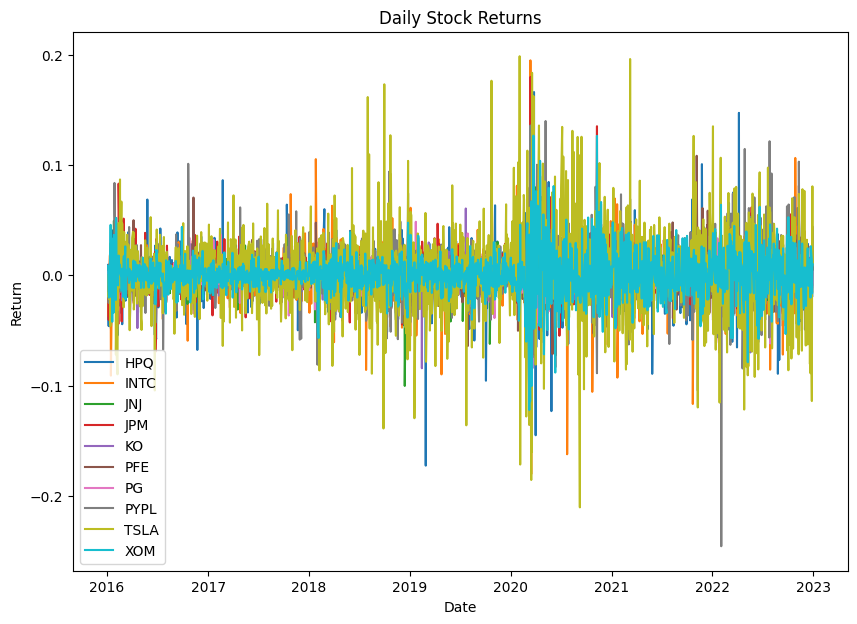

In [7]:
# Gráfica retornos.
plt.figure(figsize=(10,7))

for i in range(num_assets):
  plt.plot(returns_df.iloc[:,i], label = f"{stocks[i]}")

plt.title('Daily Stock Returns')
plt.xlabel('Date')
plt.ylabel('Return')

plt.legend(loc="lower left")
plt.show()

In [8]:
# Inversión individual en los activos.
stocks_return = (1+mean_returns)**(252)-1
stocks_risk = np.std(returns_df)*np.sqrt(252)

indv_all = pd.DataFrame({"Annualized Return" : np.round(stocks_return*100, 2),
                         "Annualized Risk" : np.round(stocks_risk*100, 2)})


print("-"*80)
print("Individual Allocation")
print("\n")
print(indv_all.T)
print("-"*80)

--------------------------------------------------------------------------------
Individual Allocation


                     HPQ   INTC    JNJ    JPM     KO    PFE     PG   PYPL  \
Annualized Return  24.04   5.12  13.33  19.32  11.50  15.01  15.28  19.62   
Annualized Risk    35.62  33.79  18.84  29.29  19.31  23.64  19.66  38.97   

                    TSLA    XOM  
Annualized Return  60.71  15.36  
Annualized Risk    58.77  29.80  
--------------------------------------------------------------------------------


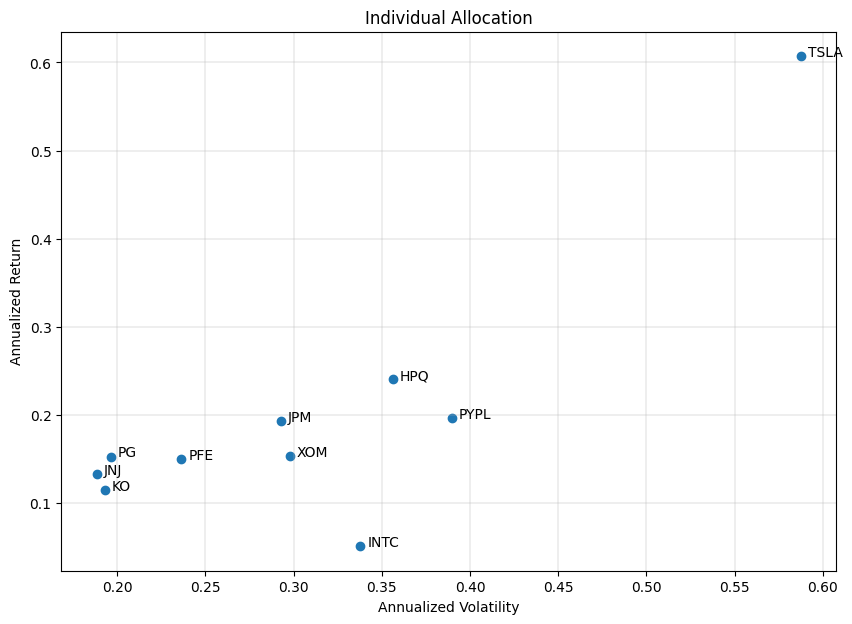

In [9]:
# Gráfica activos individuales.
plt.figure(figsize=(10,7))
plt.scatter(stocks_risk, stocks_return)

for i, name in enumerate(stocks):
    plt.annotate(name, (stocks_risk[i], stocks_return[i]), xytext=(5,0), textcoords='offset points')

plt.title('Individual Allocation')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')

plt.grid(True, linewidth=0.3)
plt.show()

In [10]:
# Simular portafolios.
weights = pd.DataFrame(np.nan, index=range(numberSim), columns=stocks)

for i in range(numberSim):
  random_numbers = np.array([random.random() for _ in range(returns_df.shape[1])])
  sum_rand_numbers = sum(random_numbers)

  weights.iloc[i,:] = random_numbers/sum_rand_numbers

print(weights)

            HPQ      INTC       JNJ       JPM        KO       PFE        PG  \
0      0.079980  0.086949  0.009553  0.155921  0.130588  0.075354  0.040490   
1      0.048622  0.020381  0.201637  0.041644  0.159956  0.145497  0.061765   
2      0.078966  0.126338  0.088123  0.110457  0.065435  0.159701  0.140219   
3      0.131897  0.042872  0.069272  0.130947  0.132560  0.128336  0.120131   
4      0.114688  0.093426  0.017972  0.149906  0.001405  0.190167  0.131664   
...         ...       ...       ...       ...       ...       ...       ...   
24995  0.000240  0.161289  0.169945  0.080048  0.113402  0.032573  0.153145   
24996  0.127406  0.148583  0.001169  0.080309  0.144172  0.049729  0.131957   
24997  0.142173  0.158304  0.119059  0.137221  0.017932  0.102711  0.038716   
24998  0.030782  0.128519  0.178108  0.068795  0.180050  0.133161  0.004994   
24999  0.032638  0.076732  0.132572  0.054579  0.189742  0.183109  0.102929   

           PYPL      TSLA       XOM  
0      0.1431

In [11]:
# Matriz de Varianza Covarianza.
cov_matrix = np.cov(returns_df, rowvar=False)

# Desviaciones estándar por activo.
stdev_assets = np.sqrt(np.diagonal(cov_matrix))

In [12]:
# Función para calcular rentabilidad de los portafolios (Anual).
def rent_Portfolios_f(weights, mean_returns):
  rtrn1 = np.dot(mean_returns, weights)
  rtrn1 = (1 + rtrn1)**(252)-1
  return rtrn1

# Función para calcular riesgo de los portafolios (Anual).
def risk_Portfolios_f(weights, varcov):
  risk1 = np.dot(weights.T, np.dot(varcov, weights))
  risk1 = np.sqrt(risk1*252)
  return risk1

# Función para calcular Sharpe Ratio.
def sharpe_ratio_f(rent, risk_free, risk):
  sr1 = (rent - risk_free)/risk
  return sr1

In [13]:
# Retornos y riesgo portafolios (Anual).
results_portfolios = pd.DataFrame(np.nan, index=range(numberSim), columns=["Rtrn", "Std Dev", "Sharpe Ratio"])

for i in range(numberSim):
  results_portfolios.iloc[i,0] = rent_Portfolios_f(weights=weights.iloc[i,:], mean_returns=mean_returns)
  results_portfolios.iloc[i,1] = risk_Portfolios_f(weights=weights.iloc[i,:], varcov=cov_matrix)
  results_portfolios.iloc[i,2] = sharpe_ratio_f(rent=results_portfolios.iloc[i,0], risk_free=risk_free, risk=results_portfolios.iloc[i,1])

print(results_portfolios)

           Rtrn   Std Dev  Sharpe Ratio
0      0.190002  0.213221      0.652147
1      0.201949  0.192496      0.784427
2      0.186914  0.197549      0.688257
3      0.185286  0.192772      0.696867
4      0.189267  0.206086      0.671161
...         ...       ...           ...
24995  0.152010  0.184688      0.547194
24996  0.202517  0.219197      0.691466
24997  0.195123  0.222702      0.647379
24998  0.153636  0.183705      0.558971
24999  0.170289  0.175787      0.678880

[25000 rows x 3 columns]


In [14]:
# Portafolio de Mínima Varianza.
min_var_index = np.argmin(results_portfolios["Std Dev"])
min_var_rent = results_portfolios.iloc[min_var_index, 0]
min_var_risk = results_portfolios.iloc[min_var_index, 1]
min_var_sr = results_portfolios.iloc[min_var_index, 2]

# Portafolio de Máxima Eficiencia.
max_sr_index = np.argmax(results_portfolios["Sharpe Ratio"])
max_sr_rent = results_portfolios.iloc[max_sr_index, 0]
max_sr_risk = results_portfolios.iloc[max_sr_index, 1]
max_sr_sr = results_portfolios.iloc[max_sr_index, 2]

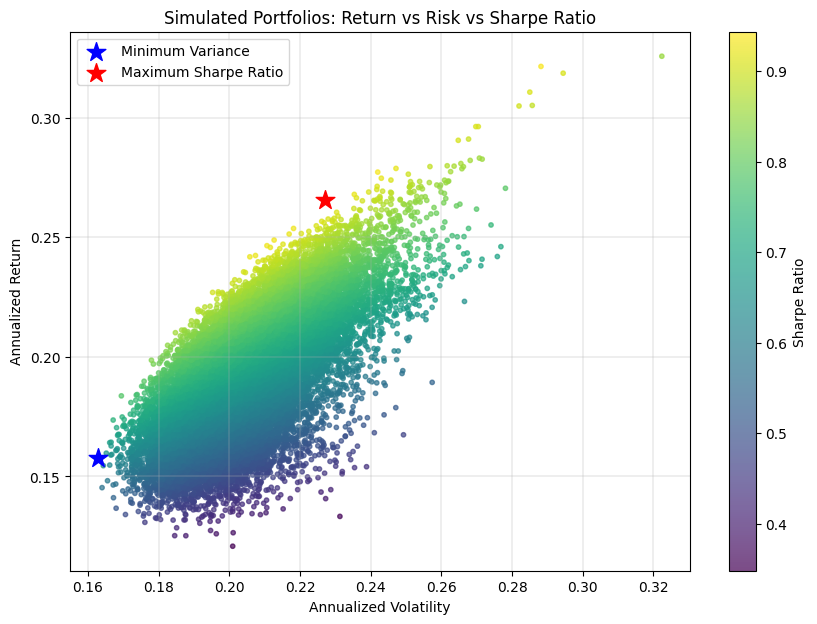

In [15]:
# Gráfica portafolios.
plt.figure(figsize=(10,7))
plt.scatter(results_portfolios["Std Dev"], results_portfolios["Rtrn"], c=results_portfolios["Sharpe Ratio"], alpha=0.7, s=10)
plt.colorbar().set_label("Sharpe Ratio")

plt.scatter(min_var_risk, min_var_rent, marker='*', s=200, color="blue", label="Minimum Variance")
plt.scatter(max_sr_risk, max_sr_rent, marker='*', s=200, color="red", label="Maximum Sharpe Ratio")

plt.title('Simulated Portfolios: Return vs Risk vs Sharpe Ratio')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')

plt.grid(True, linewidth=0.3)
plt.legend()
plt.show()

In [16]:
print("-"*80)

# Ponderaciones Portafolio de Mínima Varianza.
pond_min_vr = pd.DataFrame(weights.iloc[min_var_index], index=stocks)
pond_min_vr.columns = ["Allocation"]
pond_min_vr.Allocation = [round(i*100, 2) for i in pond_min_vr.Allocation]
print("Minimum Variance Portfolio")
print("\n")
print(f"Annualized Return: {round(min_var_rent*100, 2)}")
print(f"Annualized Risk: {round(min_var_risk*100, 2)}")
print(f"Sharpe Ratio: {round(min_var_sr, 2)}")
print("\n")
print(pond_min_vr.T)

print("-"*80)

# Ponderaciones Portafolio de Máxima Eficiencia.
pond_max_sr = pd.DataFrame(weights.iloc[max_sr_index], index=stocks)
pond_max_sr.columns = ["Allocation"]
pond_max_sr.Allocation = [round(i*100, 2) for i in pond_max_sr.Allocation]
print("Maximum Efficiency Portfolio")
print("\n")
print(f"Annualized Return: {round(max_sr_rent*100, 2)}")
print(f"Annualized Risk: {round(max_sr_risk*100, 2)}")
print(f"Sharpe Ratio: {round(max_sr_sr, 2)}")
print("\n")
print(pond_max_sr.T)
print("-"*80)

--------------------------------------------------------------------------------
Minimum Variance Portfolio


Annualized Return: 15.77
Annualized Risk: 16.29
Sharpe Ratio: 0.66


            HPQ  INTC    JNJ  JPM     KO    PFE     PG  PYPL  TSLA  XOM
Allocation  2.7  0.94  20.14  2.9  14.28  21.75  26.69  5.88  2.61  2.1
--------------------------------------------------------------------------------
Maximum Efficiency Portfolio


Annualized Return: 26.54
Annualized Risk: 22.72
Sharpe Ratio: 0.94


              HPQ  INTC   JNJ   JPM    KO  PFE     PG  PYPL   TSLA   XOM
Allocation  20.79  0.18  8.56  2.51  0.92  8.4  25.92  0.88  23.72  8.12
--------------------------------------------------------------------------------


In [17]:
# Minimización de Varianza.
def min_variance_f(varcov):
    number_assets = varcov.shape[0]
    initial_point = number_assets*[1/number_assets]

    args = (varcov)
    constraints = ({"type" : "eq", "fun" : lambda x: np.sum(x) - 1})
    bounds = tuple((0.0, 1.0) for asset in range(number_assets))

    result = scipy.optimize.minimize(risk_Portfolios_f, initial_point, args=args,
                                     method="SLSQP", bounds=bounds, constraints=constraints)
    
    return result.x

# Máximización de Sharpe Ratio.
def max_sharpe_ratio_f(mean_returns, varcov, risk_free):
    
    def auxiliar1(weights, mean_returns, varcov, risk_free):
        a = rent_Portfolios_f(weights=weights, mean_returns=mean_returns)
        b = risk_Portfolios_f(weights=weights, varcov=varcov)
        c = -((a - risk_free)/b)

        return c
    
    number_assets = len(mean_returns)
    initial_point = number_assets*[1/number_assets]

    args = (mean_returns, varcov, risk_free)
    constraints = ({"type" : "eq", "fun" : lambda x: np.sum(x) - 1})
    bounds = tuple((0.0, 1.0) for asset in range(number_assets))

    result = scipy.optimize.minimize(auxiliar1, initial_point, args=args,
                                     method="SLSQP", bounds=bounds, constraints=constraints)
    
    return result.x

# Calculo Frontera eficiente.
def efficient_frontier_f(mean_returns, varcov, target):
    number_assets = len(mean_returns)
    initial_point = number_assets*[1/number_assets]

    args = (varcov)
    constraints = ({"type" : "eq", "fun" : lambda x: rent_Portfolios_f(x, mean_returns) - target},
                   {"type" : "eq", "fun" : lambda x: np.sum(x) - 1})
    bounds = tuple((0.0, 1.0) for asset in range(number_assets))

    result = scipy.optimize.minimize(risk_Portfolios_f, initial_point, args=args,
                                     method="SLSQP", bounds=bounds, constraints=constraints)
    
    return result.x    


In [18]:
# Portafolio de Mínima Varianza (Optimización).
weights_min_var_clc = min_variance_f(cov_matrix)
min_var_rent_clc = rent_Portfolios_f(weights_min_var_clc, mean_returns)
min_var_risk_clc = risk_Portfolios_f(weights_min_var_clc, cov_matrix)
min_var_sr_clc = sharpe_ratio_f(min_var_rent_clc, risk_free, min_var_risk_clc)

# Portafolio de Máxima Eficiencia (Optimización).
weights_max_sr_clc = max_sharpe_ratio_f(mean_returns, cov_matrix, risk_free)
max_sr_rent_clc = rent_Portfolios_f(weights_max_sr_clc, mean_returns)
max_sr_risk_clc = risk_Portfolios_f(weights_max_sr_clc, cov_matrix)
max_sr_sr_clc = sharpe_ratio_f(max_sr_rent_clc, risk_free, max_sr_risk_clc)

# Frontera eficiente.
rent_targets = np.linspace(min_var_rent_clc, np.max(results_portfolios["Rtrn"]), 100)

frontier_rent_clc = []
frontier_risk_clc = []
for i in rent_targets:
    weights_clc = efficient_frontier_f(mean_returns, cov_matrix, i)
    frontier_rent_clc.append(rent_Portfolios_f(weights_clc, mean_returns))
    frontier_risk_clc.append(risk_Portfolios_f(weights_clc, cov_matrix))

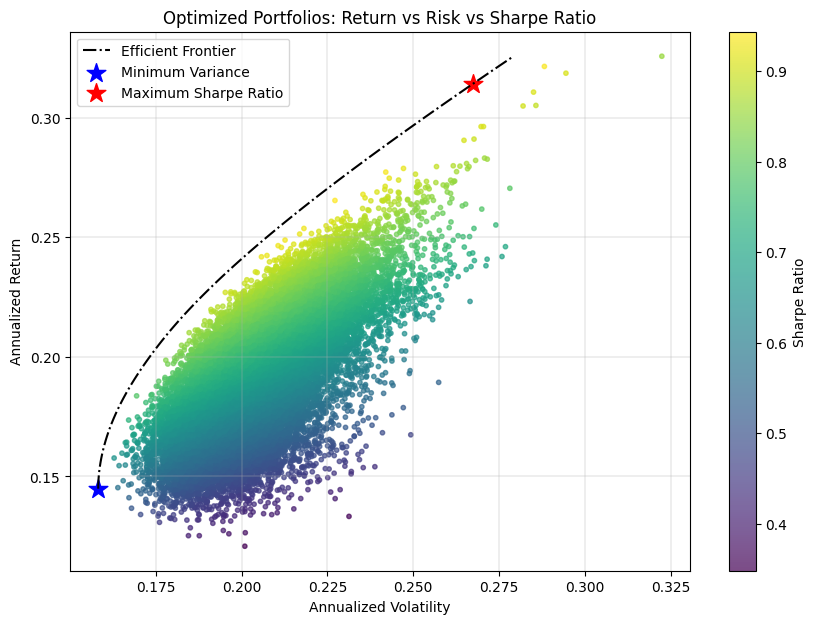

In [19]:
# Gráfica portafolios y frontera eficiente.
plt.figure(figsize=(10,7))
plt.scatter(results_portfolios["Std Dev"], results_portfolios["Rtrn"], c=results_portfolios["Sharpe Ratio"], alpha=0.7, s=10)
plt.colorbar().set_label("Sharpe Ratio")

plt.plot(frontier_risk_clc, frontier_rent_clc, linestyle = "-.", color = "black", label = "Efficient Frontier")

plt.scatter(min_var_risk_clc, min_var_rent_clc, marker='*', s=200, color="blue", label="Minimum Variance")
plt.scatter(max_sr_risk_clc, max_sr_rent_clc, marker='*', s=200, color="red", label="Maximum Sharpe Ratio")

plt.title('Optimized Portfolios: Return vs Risk vs Sharpe Ratio')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')

plt.grid(True, linewidth=0.3)
plt.legend()
plt.show()

In [20]:
print("-"*80)

# Ponderaciones Portafolio de Mínima Varianza.
pond_min_vr_clc = pd.DataFrame(weights_min_var_clc, index=stocks)
pond_min_vr_clc.columns = ["Allocation"]
pond_min_vr_clc.Allocation = [round(i*100, 2) for i in pond_min_vr_clc.Allocation]
print("Minimum Variance Portfolio")
print("\n")
print(f"Annualized Return: {round(min_var_rent_clc*100, 2)}")
print(f"Annualized Risk: {round(min_var_risk_clc*100, 2)}")
print(f"Sharpe Ratio: {round(min_var_sr_clc, 2)}")
print("\n")
print(pond_min_vr_clc.T)

print("-"*80)

# Ponderaciones Portafolio de Máxima Eficiencia.
pond_max_sr_clc = pd.DataFrame(weights_max_sr_clc, index=stocks)
pond_max_sr_clc.columns = ["Allocation"]
pond_max_sr_clc.Allocation = [round(i*100, 2) for i in pond_max_sr_clc.Allocation]
print("Maximum Efficiency Portfolio")
print("\n")
print(f"Annualized Return: {round(max_sr_rent_clc*100, 2)}")
print(f"Annualized Risk: {round(max_sr_risk_clc*100, 2)}")
print(f"Sharpe Ratio: {round(max_sr_sr_clc, 2)}")
print("\n")
print(pond_max_sr_clc.T)
print("-"*80)

--------------------------------------------------------------------------------
Minimum Variance Portfolio


Annualized Return: 14.49
Annualized Risk: 15.83
Sharpe Ratio: 0.59


            HPQ  INTC   JNJ  JPM     KO    PFE     PG  PYPL  TSLA   XOM
Allocation  0.0   0.0  30.5  0.0  23.98  11.99  22.85  1.57   1.8  7.31
--------------------------------------------------------------------------------
Maximum Efficiency Portfolio


Annualized Return: 31.42
Annualized Risk: 26.75
Sharpe Ratio: 0.98


              HPQ  INTC  JNJ   JPM   KO    PFE    PG  PYPL   TSLA  XOM
Allocation  11.33   0.0  0.0  4.39  0.0  13.41  34.3   0.0  36.57  0.0
--------------------------------------------------------------------------------


In [21]:
# Juan David Rincón, Mayo 2023.